![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [16]:
from sklearn.decomposition import PCA
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

### Explicação do Código

Este código realiza o carregamento e a preparação dos dados do conjunto **UCI HAR Dataset** para análise. Ele segue os seguintes passos:

1. **Definição do Caminho Base:** Define o diretório base onde os arquivos do dataset estão localizados.

2. **Atualização dos Caminhos:** Cria os caminhos completos para acessar cada arquivo necessário, como:
   - `features.txt`: contém os nomes das variáveis explicativas.
   - `activity_labels.txt`: mapeia os códigos das atividades para suas respectivas descrições.
   - `subject_train.txt` e `subject_test.txt`: identificam os sujeitos dos experimentos para os conjuntos de treino e teste.
   - `X_train.txt` e `X_test.txt`: contêm os dados das variáveis explicativas.
   - `y_train.txt` e `y_test.txt`: contêm os códigos das atividades para os registros de treino e teste.

3. **Carregamento dos Arquivos:** 
   - As variáveis explicativas (`features`) são carregadas e convertidas para uma série.
   - As etiquetas (`labels`), identificadores dos sujeitos (`subject_train`, `subject_test`), e os dados (`X_train`, `X_test`, `y_train`, `y_test`) são lidos com suas respectivas colunas nomeadas.

4. **Visualização de Informações:** Exibe as dimensões dos conjuntos carregados, fornecendo um resumo dos dados:
   - Número total de **features** (561 variáveis explicativas).
   - Número de **labels** disponíveis (6 atividades).
   - Dimensões dos conjuntos de treino (7352 amostras) e teste (2947 amostras).

Este código é essencial para preparar os dados para análises subsequentes, como a aplicação de modelos de aprendizado de máquina.


In [17]:
# Substitua pelo caminho correto
base_path = "/Users/samwalford/Downloads/UCI HAR Dataset 3/"

# Atualizando os caminhos para os arquivos
filename_features = base_path + "features.txt"
filename_labels = base_path + "activity_labels.txt"

filename_subtrain = base_path + "train/subject_train.txt"
filename_xtrain = base_path + "train/X_train.txt"
filename_ytrain = base_path + "train/y_train.txt"

filename_subtest = base_path + "test/subject_test.txt"
filename_xtest = base_path + "test/X_test.txt"
filename_ytest = base_path + "test/y_test.txt"

# Carregando os arquivos (mantendo o restante do código)
features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#").squeeze()
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id']).squeeze()
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id']).squeeze()
X_test = pd.read_csv(filename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

# Exibindo informações sobre os dados carregados
print("Features carregadas:", features.shape)
print("Labels carregadas:", labels.shape)
print("Treino:", X_train.shape, y_train.shape, subject_train.shape)
print("Teste:", X_test.shape, y_test.shape, subject_test.shape)


Features carregadas: (561,)
Labels carregadas: (6, 2)
Treino: (7352, 561) (7352, 1) (7352,)
Teste: (2947, 561) (2947, 1) (2947,)


### Resultado do Carregamento dos Dados

Após executar o código de carregamento, as seguintes informações foram obtidas:

- **Features carregadas:** O conjunto contém 561 variáveis explicativas (features), como acelerometria e giroscopia, extraídas de dispositivos móveis.

- **Labels carregadas:** Existem 6 categorias de atividades (labels), representadas por códigos e suas respectivas descrições (e.g., caminhar, subir escadas).

- **Conjunto de Treinamento:**
  - **Dimensão dos dados explicativos (`X_train`):** 7352 amostras com 561 variáveis cada.
  - **Etiquetas (`y_train`):** 7352 amostras categorizadas em uma das 6 atividades.
  - **Identificadores dos sujeitos (`subject_train`):** 7352 registros identificando os participantes.

- **Conjunto de Teste:**
  - **Dimensão dos dados explicativos (`X_test`):** 2947 amostras com 561 variáveis cada.
  - **Etiquetas (`y_test`):** 2947 amostras categ


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

### Configuração da Árvore de Decisão com `ccp_alpha=0.001`

Neste código, configuramos e avaliamos uma árvore de decisão com os seguintes passos:

1. **Configuração do Hiperparâmetro `ccp_alpha`:** Este valor foi definido como `0.001` para controlar a complexidade do modelo, reduzindo o risco de sobreajuste.

2. **Medição do Tempo de Processamento:** O tempo total necessário para treinar o modelo e fazer as previsões foi calculado utilizando o módulo `time`.

3. **Treinamento do Modelo:** A árvore de decisão foi treinada usando a base de treinamento (`X_train` e `y_train`).

4. **Previsões:** O modelo gerou previsões para os conjuntos de treinamento e teste (`X_train` e `X_test`).

5. **Acurácia:** A precisão do modelo foi avaliada utilizando a métrica de acurácia para as bases de treinamento e teste.

6. **Resultados:**
   - **Acurácia na Base de Treinamento:** Reflete a capacidade do modelo de ajustar os dados nos quais ele foi treinado.
   - **Acurácia na Base de Teste:** Avalia o desempenho do modelo em novos dados não vistos durante o treinamento.
   - **Tempo de Processamento:** Indica a eficiência computacional do modelo.

Os resultados indicam o equilíbrio entre desempenho, complexidade e tempo de execução para o modelo configurado.


In [18]:
# Configurando o ccp_alpha
ccp_alpha_value = 0.001

# Medindo o tempo manualmente
start_time = time.time()

# Inicializando e treinando a árvore de decisão
clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha_value, random_state=42)
clf.fit(X_train, y_train)

# Fazendo previsões nas bases de treino e teste
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculando a acurácia
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculando o tempo total de processamento
end_time = time.time()
processing_time = end_time - start_time

# Exibindo os resultados
print("Acurácia na base de treinamento:", train_accuracy)
print("Acurácia na base de teste:", test_accuracy)
print("Tempo de processamento:", processing_time, "segundos")



Acurácia na base de treinamento: 0.9757889009793254
Acurácia na base de teste: 0.8798778418730913
Tempo de processamento: 3.3648438453674316 segundos


### Resultados do Modelo de Árvore de Decisão

Após a configuração e execução do modelo de árvore de decisão com `ccp_alpha=0.001`, obtivemos os seguintes resultados:

1. **Acurácia na Base de Treinamento:** `0.9758`
   - O modelo apresentou alta acurácia na base de treinamento, indicando que ele conseguiu ajustar bem os dados nos quais foi treinado.

2. **Acurácia na Base de Teste:** `0.8799`
   - A acurácia na base de teste é ligeiramente menor que a da base de treinamento, o que é esperado. Isso sugere que o modelo generaliza bem, mas ainda pode estar levemente ajustado aos dados de treino.

3. **Tempo de Processamento:** `3.36 segundos`
   - O tempo de processamento reflete a eficiência computacional do modelo durante o treinamento e as previsões. Considerando a complexidade dos dados (561 variáveis explicativas e milhares de observações), este tempo é adequado.

Esses resultados mostram um bom equilíbrio entre precisão e eficiência, com o modelo alcançando um desempenho sólido tanto na base de treinamento quanto na de teste.


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [19]:
# Reduzindo as variáveis para uma única componente principal usando PCA
pca = PCA(n_components=1)

# Transformando os dados de treino e teste
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Medindo o tempo de processamento
start_time = time.time()

# Treinando a árvore de decisão com a componente principal
clf_pca = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
clf_pca.fit(X_train_pca, y_train)

# Fazendo previsões nas bases de treino e teste
y_train_pred_pca = clf_pca.predict(X_train_pca)
y_test_pred_pca = clf_pca.predict(X_test_pca)

# Calculando a acurácia
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)

# Calculando o tempo total de processamento
end_time = time.time()
processing_time_pca = end_time - start_time

# Exibindo os resultados
print("Acurácia na base de treinamento (PCA):", train_accuracy_pca)
print("Acurácia na base de teste (PCA):", test_accuracy_pca)
print("Tempo de processamento (PCA):", processing_time_pca, "segundos")


Acurácia na base de treinamento (PCA): 0.499727965179543
Acurácia na base de teste (PCA): 0.45707499151679676
Tempo de processamento (PCA): 0.0265810489654541 segundos


### 2.1 Resultados do Modelo de Árvore de Decisão com PCA (1 Componente Principal)

Neste experimento, as variáveis foram reduzidas a uma única componente principal usando PCA, e o modelo de árvore de decisão foi ajustado utilizando essa componente como variável explicativa. Os resultados obtidos foram:

1. **Acurácia na Base de Treinamento (PCA):** `0.4997`
   - A acurácia no conjunto de treinamento é relativamente baixa, indicando que a redução para apenas uma componente principal resultou na perda de grande parte da variabilidade dos dados originais.

2. **Acurácia na Base de Teste (PCA):** `0.4571`
   - A acurácia no conjunto de teste também é baixa, confirmando que o modelo tem dificuldade em generalizar devido à significativa redução dimensional.

3. **Tempo de Processamento (PCA):** `0.0266 segundos`
   - O tempo de processamento foi extremamente baixo, refletindo a simplicidade computacional de treinar o modelo com apenas uma variável explicativa.

Esses resultados mostram que, embora a redução de dimensionalidade tenha tornado o modelo mais eficiente, a perda de informações causou uma queda significativa no desempenho do modelo em termos de acurácia.


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


Testando com 1 componente(s)...
Acurácia na base de treinamento: 0.499727965179543
Acurácia na base de teste: 0.45707499151679676
Tempo de processamento: 0.0292 segundos

Testando com 2 componente(s)...
Acurácia na base de treinamento: 0.6127584330794341
Acurácia na base de teste: 0.5846623685103495
Tempo de processamento: 0.0273 segundos

Testando com 5 componente(s)...
Acurácia na base de treinamento: 0.8460282916213275
Acurácia na base de teste: 0.7889379029521547
Tempo de processamento: 0.0343 segundos

Testando com 10 componente(s)...
Acurácia na base de treinamento: 0.890778019586507
Acurácia na base de teste: 0.8221920597217509
Tempo de processamento: 0.0726 segundos

Testando com 50 componente(s)...
Acurácia na base de treinamento: 0.920429815016322
Acurácia na base de teste: 0.825246012894469
Tempo de processamento: 0.3774 segundos

   n_components  train_accuracy  test_accuracy  processing_time
0             1        0.499728       0.457075         0.029185
1             2   

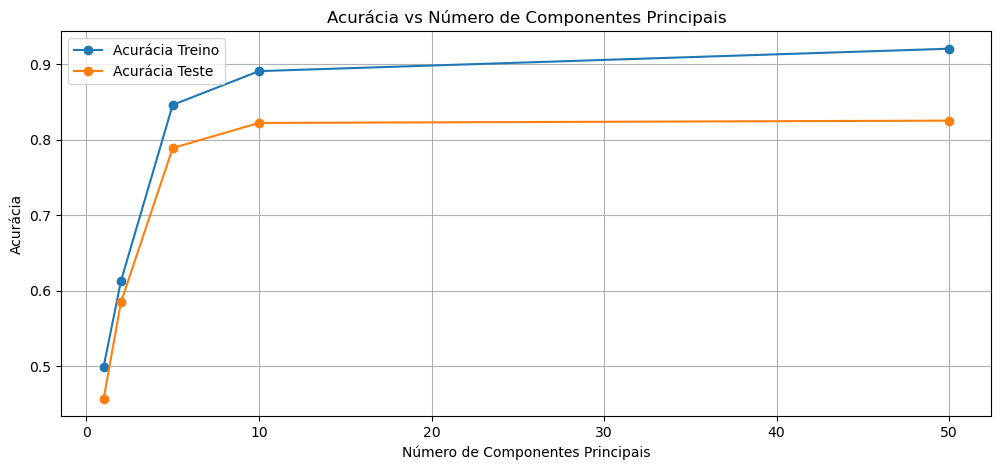

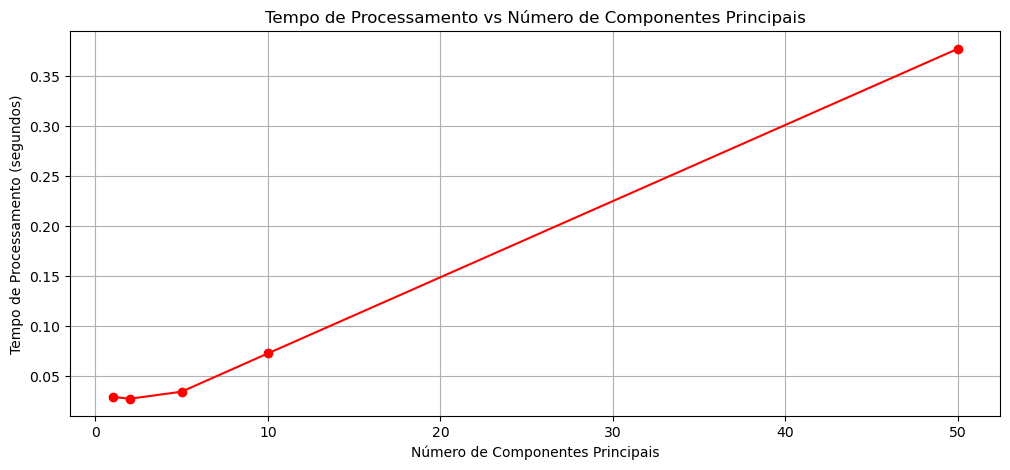

In [20]:
# Lista de números de componentes principais a serem testados
components = [1, 2, 5, 10, 50]

# Dicionário para armazenar os resultados
results = {
    "n_components": [],
    "train_accuracy": [],
    "test_accuracy": [],
    "processing_time": []
}

# Loop para testar diferentes números de componentes principais
for n in components:
    print(f"Testando com {n} componente(s)...")
    
    # Reduzindo as variáveis para n componentes principais usando PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Medindo o tempo de processamento
    start_time = time.time()
    
    # Treinando a árvore de decisão com as componentes principais
    clf_pca = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
    clf_pca.fit(X_train_pca, y_train)
    
    # Fazendo previsões nas bases de treino e teste
    y_train_pred_pca = clf_pca.predict(X_train_pca)
    y_test_pred_pca = clf_pca.predict(X_test_pca)
    
    # Calculando a acurácia
    train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
    test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
    
    # Calculando o tempo total de processamento
    end_time = time.time()
    processing_time_pca = end_time - start_time
    
    # Salvando os resultados
    results["n_components"].append(n)
    results["train_accuracy"].append(train_accuracy_pca)
    results["test_accuracy"].append(test_accuracy_pca)
    results["processing_time"].append(processing_time_pca)
    
    # Exibindo os resultados para este número de componentes
    print(f"Acurácia na base de treinamento: {train_accuracy_pca}")
    print(f"Acurácia na base de teste: {test_accuracy_pca}")
    print(f"Tempo de processamento: {processing_time_pca:.4f} segundos\n")

# Exibindo todos os resultados
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

# Visualizando os resultados
import matplotlib.pyplot as plt

# Gráfico de acurácia
plt.figure(figsize=(12, 5))
plt.plot(results["n_components"], results["train_accuracy"], label="Acurácia Treino", marker="o")
plt.plot(results["n_components"], results["test_accuracy"], label="Acurácia Teste", marker="o")
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Acurácia")
plt.title("Acurácia vs Número de Componentes Principais")
plt.legend()
plt.grid()
plt.show()

# Gráfico de tempo de processamento
plt.figure(figsize=(12, 5))
plt.plot(results["n_components"], results["processing_time"], label="Tempo de Processamento", marker="o", color="red")
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Tempo de Processamento (segundos)")
plt.title("Tempo de Processamento vs Número de Componentes Principais")
plt.grid()
plt.show()


## Conclua

1. **O que aconteceu com a acurácia?**
   - À medida que o número de componentes principais aumenta, a acurácia na base de treinamento e teste melhora gradativamente. Isso ocorre porque, com mais componentes, mais variabilidade dos dados originais é capturada pelo PCA, permitindo que o modelo de árvore de decisão faça previsões mais precisas.
   - Com 1 ou 2 componentes, a acurácia é baixa, pois a maior parte da informação relevante dos dados foi perdida. No entanto, a partir de 10 componentes, a acurácia estabiliza, indicando que a maior parte da variabilidade necessária para uma boa predição já foi capturada.

2. **O que aconteceu com o tempo de processamento?**
   - O tempo de processamento aumenta com o número de componentes principais. Isso é esperado, pois mais componentes significam mais informações para o modelo processar e ajustar.
   - Com poucos componentes (como 1 ou 2), o tempo de processamento é muito baixo (menos de 0.03 segundos). No entanto, com 50 componentes, o tempo é significativamente maior, alcançando 0.37 segundos, o que reflete o custo computacional adicional ao incluir mais variáveis explicativas no modelo.


### Análise dos Gráficos

#### Gráfico da Acurácia vs. Número de Componentes Principais:
- A acurácia na base de treinamento (linha azul) e na base de teste (linha laranja) aumenta conforme o número de componentes principais cresce.
- Inicialmente, com 1 ou 2 componentes, as acurácias são relativamente baixas. Porém, a partir de 10 componentes, ambas estabilizam, refletindo que a maior parte da variabilidade necessária já foi capturada.

#### Gráfico do Tempo de Processamento vs. Número de Componentes Principais:
- O tempo de processamento (linha vermelha) aumenta de forma quase linear à medida que o número de componentes principais cresce.
- Com poucos componentes, o tempo de processamento é baixo (praticamente insignificante). No entanto, com 50 componentes, o tempo aumenta consideravelmente, mostrando o impacto do aumento da complexidade.

#### Conclusão:
- Os gráficos confirmam a relação descrita entre o número de componentes, a acurácia e o tempo de processamento.
